In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('lymphography.csv')
data.head()

,3,4,2,1,1.1,1.2,1.3,1.4,2.1,1.5,2.2,2.3,2.4,4.1,8,1.6,1.7,2.5,2.6
0,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
1,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
2,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
3,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1
4,2,2,1,1,1,1,1,1,2,1,3,3,3,3,6,3,1,2,4


In [3]:
data.columns=['class','lymphatics','block of affere','bl. of lymph','bl. of lymph','by pass','extravasates','regeneration of',
            'early uptake in','lym.nodes dimin','lym.nodes enlar','changes in lym','defect in node','changes in node',
            'changes in stru','special forms','dislocation of','exclusion of no','no. of nodes in']
data.head()

,class,lymphatics,block of affere,bl. of lymph,bl. of lymph,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
1,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
2,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
3,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1
4,2,2,1,1,1,1,1,1,2,1,3,3,3,3,6,3,1,2,4


In [4]:
data.isnull().sum()

class              0
lymphatics         0
block of affere    0
bl. of lymph       0
bl. of lymph       0
by pass            0
extravasates       0
regeneration of    0
early uptake in    0
lym.nodes dimin    0
lym.nodes enlar    0
changes in lym     0
defect in node     0
changes in node    0
changes in stru    0
special forms      0
dislocation of     0
exclusion of no    0
no. of nodes in    0
dtype: int64

In [5]:
data.dtypes

class              int64
lymphatics         int64
block of affere    int64
bl. of lymph       int64
bl. of lymph       int64
by pass            int64
extravasates       int64
regeneration of    int64
early uptake in    int64
lym.nodes dimin    int64
lym.nodes enlar    int64
changes in lym     int64
defect in node     int64
changes in node    int64
changes in stru    int64
special forms      int64
dislocation of     int64
exclusion of no    int64
no. of nodes in    int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   class            147 non-null    int64
 1   lymphatics       147 non-null    int64
 2   block of affere  147 non-null    int64
 3   bl. of lymph     147 non-null    int64
 4   bl. of lymph     147 non-null    int64
 5   by pass          147 non-null    int64
 6   extravasates     147 non-null    int64
 7   regeneration of  147 non-null    int64
 8   early uptake in  147 non-null    int64
 9   lym.nodes dimin  147 non-null    int64
 10  lym.nodes enlar  147 non-null    int64
 11  changes in lym   147 non-null    int64
 12  defect in node   147 non-null    int64
 13  changes in node  147 non-null    int64
 14  changes in stru  147 non-null    int64
 15  special forms    147 non-null    int64
 16  dislocation of   147 non-null    int64
 17  exclusion of no  147 non-null    int64
 18  no. of nod

In [7]:
data.describe()

,class,lymphatics,block of affere,bl. of lymph,bl. of lymph,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,2.448980,2.734694,1.551020,1.176871,1.047619,1.244898,1.510204,1.068027,1.700680,1.061224,2.476190,2.401361,2.972789,2.795918,5.197279,2.340136,1.666667,1.789116,2.605442
std,0.575572,0.813638,0.499091,0.382864,0.213687,0.431497,0.501605,0.252653,0.459526,0.314588,0.838568,0.569305,0.867571,0.757960,2.166493,0.771909,0.473016,0.409331,1.910884
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000
max,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000


In [8]:
X = data.drop('class',axis='columns')
y = testLabels = data['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [9]:
y_train.value_counts()

2    64
3    48
4     3
1     2
Name: class, dtype: int64

In [10]:
y.value_counts()

2    81
3    60
4     4
1     2
Name: class, dtype: int64

In [11]:
81/60

1.35

In [12]:
y_test.value_counts()

2    17
3    12
4     1
Name: class, dtype: int64

In [13]:
X_train.shape

(117, 18)

In [14]:
X_test.shape

(30, 18)

In [15]:
X_train[:10]

,lymphatics,block of affere,bl. of lymph,bl. of lymph,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
33,4,2,1,1,2,2,1,2,1,3,3,4,3,4,3,2,2,2
38,2,1,1,1,1,1,1,2,1,2,2,2,1,7,1,2,2,2
72,3,1,1,1,1,1,1,2,1,4,3,3,4,5,3,2,2,3
107,3,2,1,1,1,2,1,1,1,2,3,4,2,4,1,1,1,1
17,3,1,1,1,1,1,1,2,1,2,2,2,3,2,1,2,2,1
83,4,1,1,1,1,2,1,2,1,4,3,4,2,5,3,2,2,2
98,3,2,1,1,1,2,1,1,1,2,2,4,3,4,1,2,2,2
24,3,1,1,1,1,2,1,1,1,3,2,3,3,8,3,2,2,2
115,4,1,1,1,1,1,1,2,1,3,2,2,4,3,2,2,1,1
44,2,1,1,1,1,1,1,2,1,2,2,2,2,8,2,2,2,1


In [16]:
len(X_train.columns)

18

In [17]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [18]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
X=X.astype('float32')
y=LabelEncoder().fit_transform(y)
n_features=X_train.shape[1]
model=Sequential()
model.add(Dense(10,activation='relu',input_shape=(n_features,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)
acc=model.evaluate(X_test,y_test)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: -7.8514 - accuracy: 0.0171
Epoch 2/100
4/4 [==============================] - 0s 998us/step - loss: -8.6127 - accuracy: 0.0171
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: -9.3886 - accuracy: 0.0171
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: -10.1816 - accuracy: 0.0171
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: -10.9679 - accuracy: 0.0171
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: -11.8406 - accuracy: 0.0171
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: -12.7744 - accuracy: 0.0171
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: -13.7487 - accuracy: 0.0171
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: -14.8990 - accuracy: 0.0171
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: -16.1122 - accuracy: 0.0171
Epoch 11/1

4/4 [==============================] - 0s 2ms/step - loss: -658.0044 - accuracy: 0.0171
Epoch 83/100
4/4 [==============================] - 0s 2ms/step - loss: -679.2500 - accuracy: 0.0171
Epoch 84/100
4/4 [==============================] - 0s 1ms/step - loss: -701.3061 - accuracy: 0.0171
Epoch 85/100
4/4 [==============================] - 0s 2ms/step - loss: -723.2406 - accuracy: 0.0171
Epoch 86/100
4/4 [==============================] - 0s 998us/step - loss: -746.7501 - accuracy: 0.0171
Epoch 87/100
4/4 [==============================] - 0s 1ms/step - loss: -769.6440 - accuracy: 0.0171
Epoch 88/100
4/4 [==============================] - 0s 1ms/step - loss: -793.5322 - accuracy: 0.0171
Epoch 89/100
4/4 [==============================] - 0s 2ms/step - loss: -817.7513 - accuracy: 0.0171
Epoch 90/100
4/4 [==============================] - 0s 1ms/step - loss: -842.8390 - accuracy: 0.0171
Epoch 91/100
4/4 [==============================] - 0s 2ms/step - loss: -867.9293 - accuracy: 0.0171
E

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()

In [20]:
param_grid={
    'n_estimators':[200,500],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[4,5,6,7,8],
    'criterion':['gini','entropy']
}

In [21]:
CV_rfc=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
CV_rfc.fit(X_train,y_train)

C:\Users\Manasa\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [22]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [29]:
rfc1=RandomForestClassifier(random_state=42,max_features='sqrt',criterion='entropy',max_depth=4,n_estimators=200)

In [30]:
rfc1.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       n_estimators=200, random_state=42)

In [31]:
pred=rfc1.predict(X_test)

In [32]:
print('Accuracy for Randomforest:',accuracy_score(y_test,pred)*100)

Accuracy for Randomforest: 83.33333333333334


In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           2       0.77      1.00      0.87        17
           3       1.00      0.58      0.74        12
           4       1.00      1.00      1.00         1

    accuracy                           0.83        30
   macro avg       0.92      0.86      0.87        30
weighted avg       0.87      0.83      0.82        30



<AxesSubplot:>

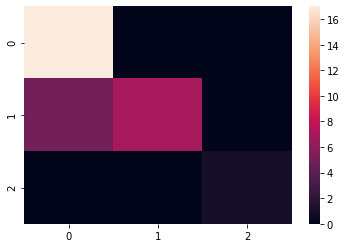

In [35]:
sb.heatmap(confusion_matrix(y_test,pred))

In [36]:
import pickle

In [37]:
pickle.dump(rfc1,open('lympnn.pkl','wb'))